# Shot and pass maps

## Tutorial

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [41]:
pitchLengthX = 120
pitchWidthY = 80

We study first the game between Sweden and England during Women WC.

In [42]:
match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"
file_name = str(match_id_required)+'.json'

Let's load the data:

In [43]:
#match events
with open('Statsbomb/data/events/'+file_name) as data_file:
    data = json.load(data_file)

In [44]:
from pandas.io.json import json_normalize
df = json_normalize(data, sep = '_').assign(match_id =  file_name[:-5])

C:\Users\lolo2\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [45]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

We now plot the shots:

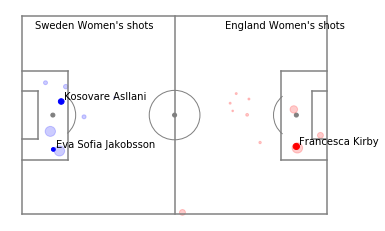

In [46]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX, pitchWidthY,'yards','gray')

for i,shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circleSize = 2
    circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)

    if (team_name == home_team_required):
        if goal:
            shotCircle = plt.Circle((x,pitchWidthY-y),circleSize,color = "red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle = plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name == away_team_required):
        if goal:
            shotCircle = plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle = plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
plt.show()

## Exercice


- Create a dataframe of passes which contains all the passes in the match 
- Plot the start point of every Sweden pass. Attacking left to right.
- Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
- Plot arrows to show where the passes went

In [47]:
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

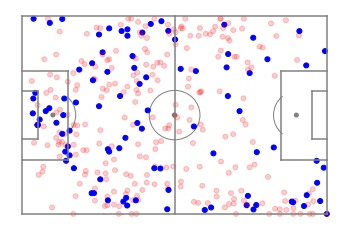

In [63]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX, pitchWidthY,'yards','gray')

for i,pass_ in passes.iterrows():
    x = pass_['location'][0]
    y = pass_['location'][1]
    
    uncompleted = pass_['pass_outcome_name']=='Incomplete'
    team_name = pass_['team_name']
    
    circleSize = 1

    if (team_name == away_team_required):
        if uncompleted:
            passCircle = plt.Circle((x,pitchWidthY-y),circleSize,color = "blue")
            #plt.text((x+1),pitchWidthY+1,pass_['player_name']) 
        else:
            passCircle = plt.Circle((x,pitchWidthY-y),circleSize,color="red", alpha = 0.2)
    
        ax.add_patch(passCircle)

plt.show()

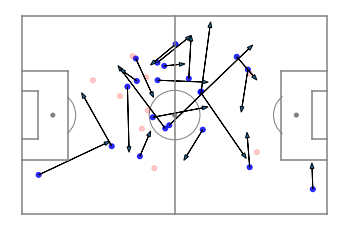

In [72]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX, pitchWidthY,'yards','gray')

for i,pass_ in passes.iterrows():
    x = pass_['location'][0]
    y = pass_['location'][1]
    dx = pass_['pass_end_location'][0]-x
    dy = pass_['pass_end_location'][1]-y
    uncompleted = pass_['pass_outcome_name']=='Incomplete'
    player_name = pass_['player_name']
    
    
    circleSize = 1

    if (player_name == 'Sara Caroline Seger'):
        if uncompleted:
            passCircle = plt.Circle((x,pitchWidthY-y),circleSize,color = "red", alpha = 0.2)
            
            #plt.text((x+1),pitchWidthY+1,pass_['player_name']) 
        else:
            passCircle = plt.Circle((x,pitchWidthY-y),circleSize,color="blue", alpha = 0.8)
            plt.arrow(x,pitchWidthY-y,dx,dy, head_width = 1.5)
        ax.add_patch(passCircle)

plt.show()

## Homework

- Think of a player who you enjoyed watching at the recent Men's or Women's World Cups.
- What actions did they perform that were important and why?
- Plot the actions and describe how the data supports or contradicts your own analysis.

As a French I have to say Mbappé during the game against Argentina. Many others would have said Pavard but I think that he was not as important as Mbappé on the entire game, even if his goal was wonderful. 

<img src="mbappe.jpg" alt="Drawing" style="width: 300px;"/>

Let's see all his shots on target and his expected goals for those shots during the entire tournament.

First, we have to load all the matches that France played.

In [119]:
with open('Statsbomb/data/competitions.json') as f:
    competitions = json.load(f)
    
#Mens World Cup 2019 has competition ID 43
competition_id=43

with open('Statsbomb/data/matches/'+str(competition_id)+'/3.json') as f:
    matches = json.load(f)
    
france_games = []
for match in matches:
    if (match['home_team']['home_team_name'] == 'France'):
        france_games.append(match)
    elif (match['away_team']['away_team_name'] == 'France'):
        france_games.append(match)

In [94]:
for match in france_games:
    if match == france_games[0]:  
        file_name = str(match['match_id'])
        with io.open('Statsbomb/data/events/'+file_name+'.json', encoding='utf-8') as data_file:
        #print (mypath+'events/'+file)
            data = json.load(data_file)
        df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])
    else:
        file_name = str(match['match_id'])
        with io.open('Statsbomb/data/events/'+file_name+'.json', encoding='utf-8') as data_file:
        #print (mypath+'events/'+file)
            data = json.load(data_file)
        gdf = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])
        df = pd.concat([df, gdf])

C:\Users\lolo2\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys
C:\Users\lolo2\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


In [95]:
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

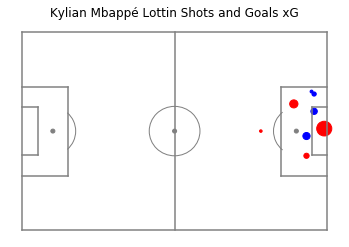

In [122]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX, pitchWidthY,'yards','gray')
ax.legend
for i,shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    goal = shot['shot_outcome_name']=='Goal'
    player_name = shot['player_name']
    
    circleSize = 3
    circleSize = np.sqrt(shot['shot_statsbomb_xg']*10)
    if (player_name == 'Kylian Mbappé Lottin'):
        if goal:
            shotCircle = plt.Circle((x,y),circleSize,color = "red")
            
            #plt.text((x+1),pitchWidthY+1,pass_['player_name']) 
        else:
            shotCircle = plt.Circle((x,y),circleSize,color="blue")
        ax.add_patch(shotCircle)
        ax.set_title("{0} Shots and Goals xG".format(player_name))
plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Goals are in red and missed shots are in blue.

Mbappé is shooting not that much (a bit surprised, I thought he shoted at a higher frequency) but he seems to wait for the best opportunity to shoot. Only one of his shot is outside the box and it is a goal (vs Croatia in the final). 
Another thing that can be noticed here is that his expected goals ratio is quite close to reality, even lower! He score more often than he is expected to.